<a href="https://colab.research.google.com/github/Rashida-Rangwala/Jamboree-Education-Linear-Regression/blob/main/Jamboree_Education_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Jamboree**

Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

# **Goal of the Case study :**

*   Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves.
*   It will also help predict one's chances of admission given the rest of the variables.





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving jamboree.csv to jamboree (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("jamboree.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# **Exploratory Data Analysis**

In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()/len(df)*10

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

The data provided doesn't have any NULL values. The datatype of the columns is either integer or float.

# **Column Profiling:**
The following columns have been provided to us :

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df["University Rating"].value_counts(normalize=True)*100

3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: University Rating, dtype: float64

In [ ]:
df["Research"].value_counts(normalize=True)*100

1    56.0
0    44.0
Name: Research, dtype: float64

In [ ]:
df["SOP"].value_counts(normalize=True)*100

4.0    17.8
3.5    17.6
3.0    16.0
2.5    12.8
4.5    12.6
2.0     8.6
5.0     8.4
1.5     5.0
1.0     1.2
Name: SOP, dtype: float64

In [ ]:
df["LOR "].value_counts(normalize=True)*100

3.0    19.8
4.0    18.8
3.5    17.2
4.5    12.6
2.5    10.0
5.0    10.0
2.0     9.2
1.5     2.2
1.0     0.2
Name: LOR , dtype: float64

In [ ]:
df["Chance of Admit "].value_counts(normalize=True)

0.71    0.046
0.64    0.038
0.73    0.036
0.72    0.032
0.79    0.032
        ...  
0.38    0.004
0.36    0.004
0.43    0.002
0.39    0.002
0.37    0.002
Name: Chance of Admit , Length: 61, dtype: float64

Dropping Serial no. column as we don't want our model to develop any understanding using it's values.

In [ ]:
df.drop(columns = ["Serial No."], inplace= True)

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df["University Rating"].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

# **Graphical Exploration**

As all the features provided are either integer or float we can say that we have to only perform numerical analysis.

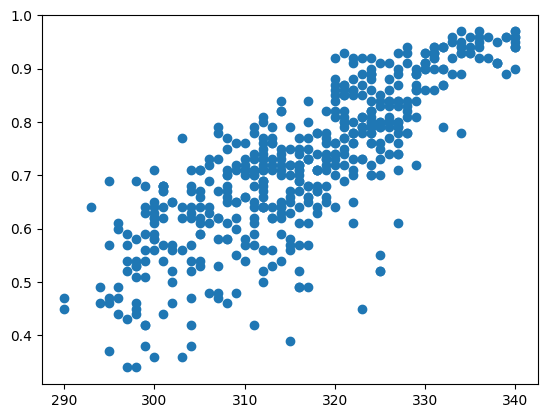

In [ ]:
plt.scatter(x = df["GRE Score"], y = df["Chance of Admit "])


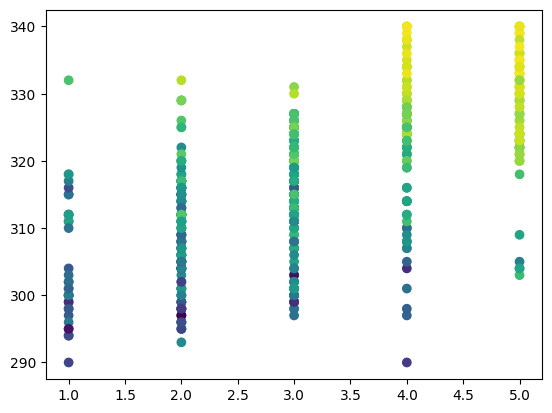

In [ ]:
plt.scatter(x = df["University Rating"], y = df["GRE Score"], c = df["Chance of Admit "])


The above graph clearly demonstartes that Higher Ranking Unviersities are having students with High GRE scores. The chances of admission also can be clearly seen here.

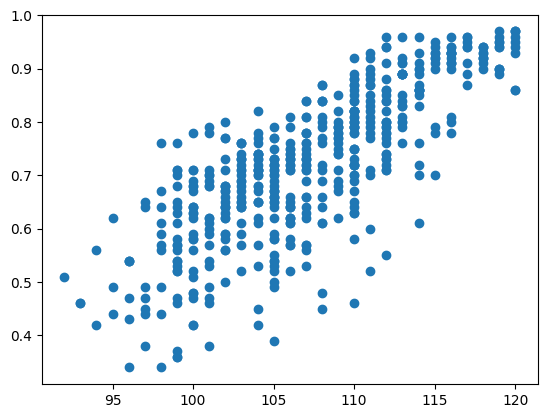

In [ ]:
plt.scatter(x = df["TOEFL Score"], y = df["Chance of Admit "])


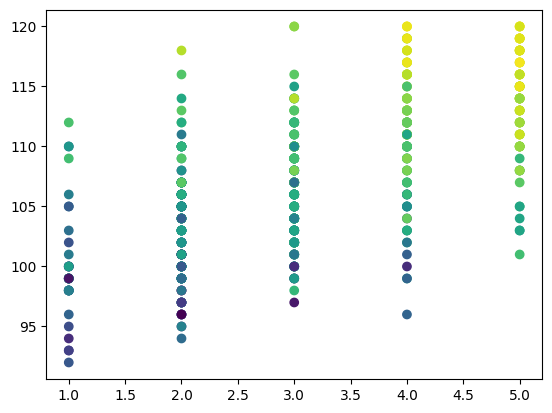

In [ ]:
plt.scatter(x = df["University Rating"], y = df["TOEFL Score"], c = df["Chance of Admit "])


The above graph clearly demonstartes that Higher Ranking Unviersities are having students with High TOEFL scores. The chances of admission also can be clearly seen here.

The insight looks similar to GRE scores.

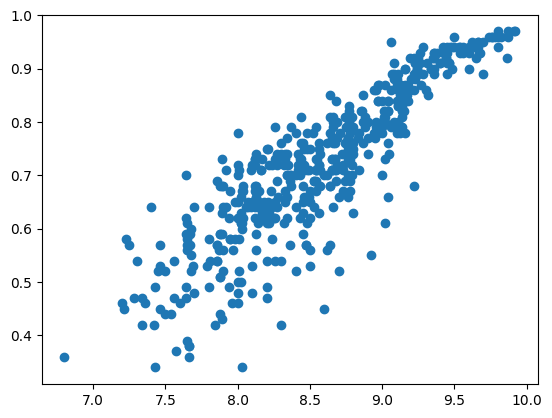

In [ ]:
plt.scatter(x = df["CGPA"], y = df["Chance of Admit "])


The above graph between CGPA and Chance of Admit shows that students having Higher CGPA have a high chance of getting admission.

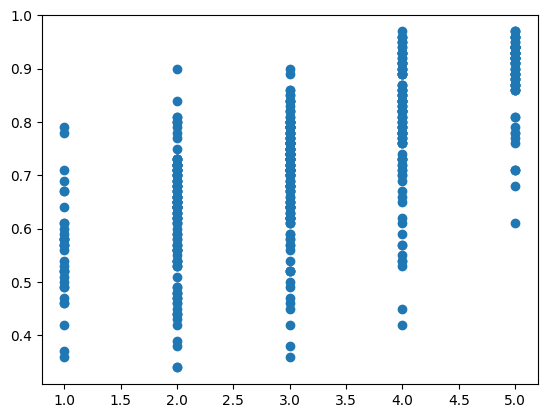

In [ ]:
plt.scatter(x = df["University Rating"], y = df["Chance of Admit "])


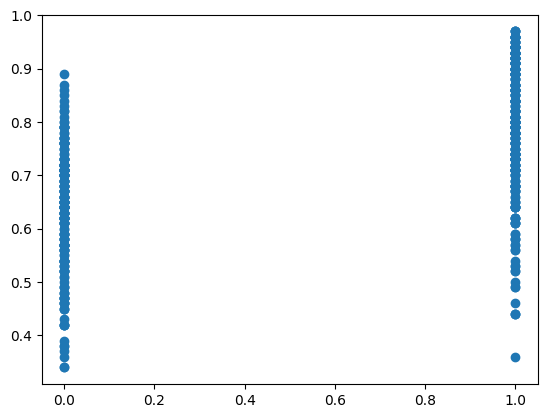

In [ ]:
plt.scatter(x = df["Research"], y = df["Chance of Admit "])


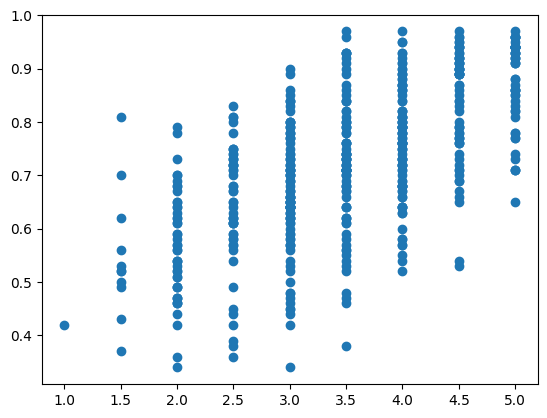

In [ ]:
plt.scatter(x = df["LOR "], y = df["Chance of Admit "])


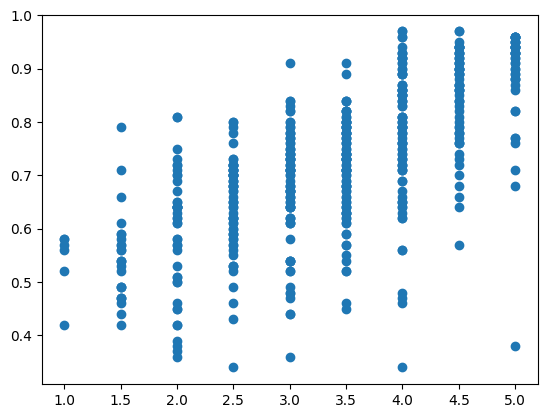

In [ ]:
plt.scatter(x = df["SOP"], y = df["Chance of Admit "])


In [ ]:
df.corr()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


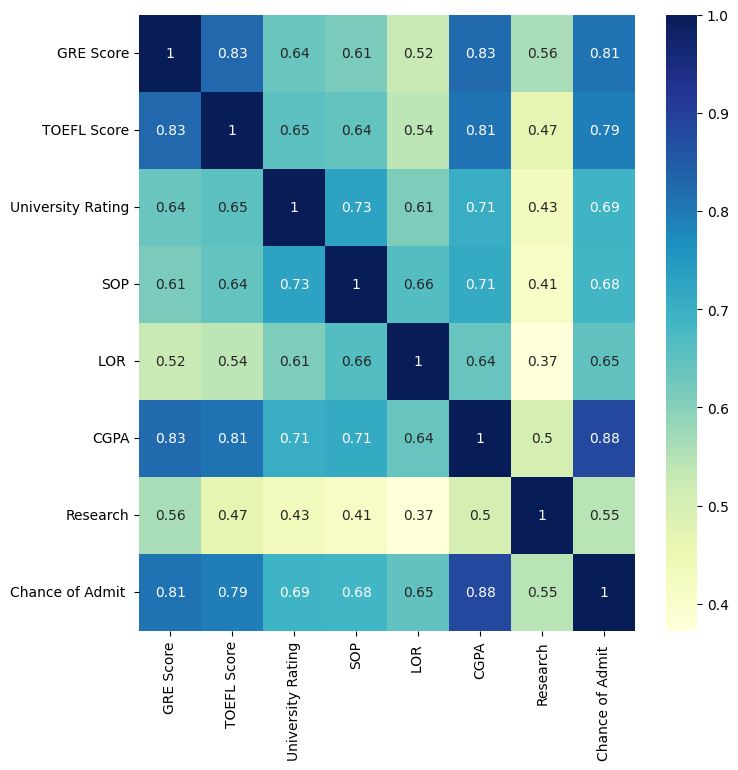

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# **Correlation Insights**
Looking at the correlation above between various columns with our target column (CHANCE OF ADMIT), I can say that -
1. There is a high correlation between GRE Score, TOEFL Score and Chance of Admit
2. There is a some correlation between University Rating, SOP, LOR and Chance of Admit
4. There is a very high correlation between CGPA and Chance of Admit
5. Research column has least effect in comparision to all others on Chances of Admission

By looking at the insights above we can say that the given problem is a LINEAR REGRESSION problem.

To solve it, using StatsModel library.


<img src='https://drive.google.com/uc?id=1UqMvediPF0U3eYIf0goSwDEvTpDT-OIx' width=800>



In [ ]:
import statsmodels.api as sm

Dividing the given data in 2 parts -
**X - Features :**
1. GRE Score
2. TOEFL Score
3. University Rating
4. SOP
5. LOR
6. Reaearch
7. CGPA



**Y - Target :**
1. Chance of Admit

In [ ]:
y=df[['Chance of Admit ']]
X=df.drop('Chance of Admit ', axis=1)

Dividing the data into Training (75%) and Testing(25%) data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
y_train = np.array(y_train)

**Let's train our model using StatsModel library**

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     256.7
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          3.57e-137
Time:                        16:57:33   Log-Likelihood:                 533.85
No. Observations:                 375   AIC:                            -1052.
Df Residuals:                     367   BIC:                            -1020.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3452      0.12

The advantage of using StatsModel is that it is providing us with the R squared and adjusted R squared values directly.

R-squared:                       0.830

Adj. R-squared:                  0.827

Let's look at few of the variables in this table:

- Dep. Variable: This column displays the name of the dependent variable being predicted in the regression. (y in our case)

- Model: It provides a concise representation of the model type and method used, such as "OLS" (Ordinary Least Squares).

- R-squared: Represents the coefficient of determination (R-squared) value.

- Adj. R-squared: This is the adjusted R-squared value, which accounts for the number of predictors in the model and adjusts the R-squared accordingly.

There is a little difference in R-squared and Adj R-Squared values.

## Assumptions of Linear Regression




<img src='https://drive.google.com/uc?id=11ec-xn-dBFrzNkvKgkGmS8cukMWx6GsF' width=800>


We can prove that Linear regression is a very good model if all the statistical assumptions holds true.

Let's check them one by one.

It is important to Scale the data, so using **STANDARD SCALER** for it.

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('Chance of Admit ')]
y = df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     272.1
Date:                Fri, 15 Sep 2023   Prob (F-statistic):          3.33e-146
Time:                        16:57:33   Log-Likelihood:                 573.41
No. Observations:                 400   AIC:                            -1131.
Df Residuals:                     392   BIC:                            -1099.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7221      0.003    247.782      0.0

# **Multicollinearity Check**
- When one or more input variables exhibhit strong correlation
- One variable is enough to be part of the model.

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,CGPA,4.77
0,GRE Score,4.24
1,TOEFL Score,4.06
3,SOP,2.71
2,University Rating,2.59
4,LOR,1.98
6,Research,1.47


<img src='https://drive.google.com/uc?id=1HE8FYMrDN0DLxHsH-spdQX3vaIbykGE9' width=800>


The VIF values given by model are less than 5 which symbolizes **LOW MULTICOLLINEARITY**.

Linear regression model works well in such scenario. No need of removing/dropping any feature.

Let's check the next assumption.

## 3. Errors are normally distributed

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

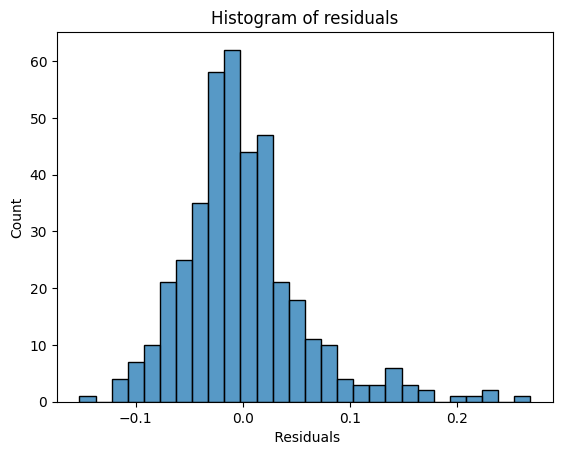

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

0.9314318299293518

Closer the value to 1, more is the normality.

In this case, a value of 0.93 denotes a high level of normality for the error distribuiton

- If the distribution of errors is gaussian distribution then the assumption of error being normally distributed is being sastified (sanity check)



4. Heteroskadestacity shouldn't exist


<img src='https://drive.google.com/uc?id=130QuKwCqlJZuYacz9XkQ90F9Du-VZsOv' width=800>


In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

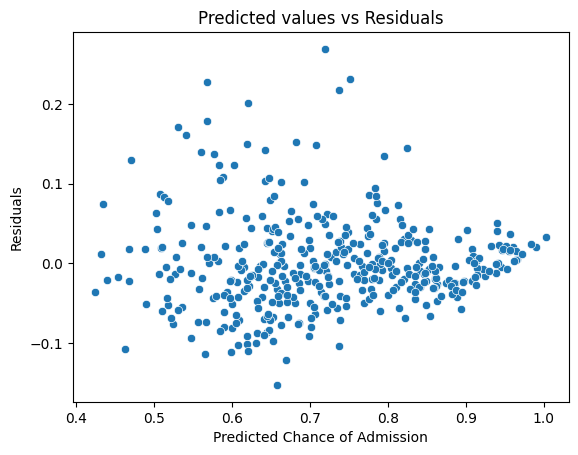

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("Predicted Chance of Admission")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.0772994279987236), ('p-value', 0.3032327647981612)]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.0772 => Implying minimal difference in variance between groups
- p-value of 0.3032 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

**5. Autocorrelation**

<img src='https://drive.google.com/uc?id=1ASQ8QsZdoekhH_Z7gtq20x9yeU-VrnMZ' width=800>



# **Assumptions of Linear Regression Insights:**
  - There exist a linear function
  - No multicollinearity
  - Errors are normally distributed
  - No heteroskedasticity
  - There is no auto correlation (related to time series)

We also have a fundamental assumption: $x^{(i)}, y^{(i)}$ are a random sample

# **Applying L1 and L2 regularization**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features
degree = 5
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)


taking MSE as metric instead of Adj.R-sq

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 6.752280973916354
MSE for train: 7.809254248276533e-22


Clearly degree = 5 overfits in the model, increasing the MSE.

In [ ]:
lasso_model = Lasso(alpha=0.01)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1.0)    # Alpha is the regularization strength

In [ ]:
# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

Ridge()

In [ ]:
lasso_predictions = lasso_model.predict(X_train_poly_scaled)
ridge_predictions = ridge_model.predict(X_train_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_train, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_train, ridge_predictions))

test MSE for L1: 0.0036923994575747588
test MSE for L2: 0.0030771485977502612


In [ ]:
lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 0.0037294101004085502
test MSE for L2: 0.003784131562993841


Clearly the MSE values have been reduced drastically by applying L1(Lasso) and L2(Ridge) regularization methods.

# **CONCLUSION**

After applying all the tests above we come to the conculsion that the data provided to us can be modeled using Linear Regression model.

The data provided has no unwanted features so we can use all of those for the prediction of their impact on the given data.

1. Students having high GRE Score and TOEFL Score have high chances of getting admission in Unviersities with high rating.
2. Students secring high CGPA have very high chance of admission.
3. Research is not a very important feature to get admission.






# **RECOMMENDATIONS**

I would like to recommend the following -
1. Students looking for Admission in the Ivy league colleges should aim for high TOEFL, GRE and CGPA.
2. Universities can be identified by looking at their ratings.
3. Jamboree can use the above analysis to mention on their website the important factors for admission in Ivy league colleges.
4. Jamboree can help the students improve TOEFL, GRE and CGPA score of the students by introducing practice papers, mock test, etc.